# Veränderungen der Geburtenrate zwischen 1950 und 2023

Gruppe: Lia Müller, Selina Rüdisüli, Melanie Pomellitto

Fragen
- In welchen Jahren ist die Geburtenrate bemerkenswert gestiegen oder gesunken?
- Welche Ursprünge veranlassen die Veränderungen?

Quelle: https://ourworldindata.org/grapher/crude-birth-rate?tab=table


## 1. Daten beschaffen und laden

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# loading the data
df = pd.read_csv('crude-birth-rate.csv', skiprows=1,
                names=['Entity','Code','Year','Birth rate'])
df.head()

,Entity,Code,Year,Birth rate
0,Afghanistan,AFG,1950,49.380
1,Afghanistan,AFG,1951,49.624
2,Afghanistan,AFG,1952,49.784
3,Afghanistan,AFG,1953,49.979
4,Afghanistan,AFG,1954,50.004


## 2. Daten vorbereiten

- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert ein Jahr (Year) und die Zeilen sind die verschiedenen Ethnien (Entity) - in alphabetischer Reihenfolge.

In [6]:
df_pivot = df.pivot(index='Entity', columns='Year', values= 'Birth rate')
df_pivot.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,49.380,49.624,49.784,49.979,50.004,50.156,50.279,50.306,50.424,50.456,...,39.646,39.364,38.732,38.171,37.624,37.138,36.601,36.342,36.045,35.437
Albania,39.298,39.659,39.790,40.692,41.433,41.913,41.605,41.113,41.427,41.518,...,13.071,12.431,11.873,11.416,10.898,10.757,10.536,10.512,10.305,10.244
Algeria,50.602,50.284,49.961,49.746,49.666,49.625,49.516,49.404,49.397,49.114,...,26.063,25.811,25.439,25.015,24.063,23.379,22.430,21.392,20.491,19.625
Andorra,15.345,16.850,16.899,16.663,15.891,15.931,16.460,17.343,18.255,19.212,...,8.973,9.132,8.432,7.831,7.159,6.993,6.831,6.828,6.850,6.859
Angola,44.290,45.015,46.163,47.224,48.186,49.037,49.771,50.387,50.891,51.295,...,42.503,41.847,41.183,40.595,40.057,39.539,39.127,38.670,38.102,37.588


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* (Ethnien) enthält 201 verschiedene Ethnien
- Die Spalte *Codes* inkludiert ebenfalls 201 verschiedene Codes 
- Es sind Daten zwischen 1950 und 2023 vorhanden. Der Datensatz beeinhaltet 74 Jahre. Zu jedem Jahr sind gleich viele Daten verfügbar, weshalb der Datensatz seit Beginn der Aufzeichnung 1950 komplett ist.
- Die Geburtenrate streut zwischen ........maximum, minimum

In [7]:
df.dtypes

Entity         object
Code           object
Year            int64
Birth rate    float64
dtype: object

### 3.1 Analyse Codes

In [8]:
print('Anzahl verschiedener Codes:  ', len(df['Code'].unique()))

Anzahl verschiedener Codes:   201


In [9]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
AFG    74
PAN    74
NIC    74
NER    74
NGA    74
       ..
GRC    74
GRL    74
GRD    74
GTM    74
ZWE    74
Name: count, Length: 201, dtype: int64

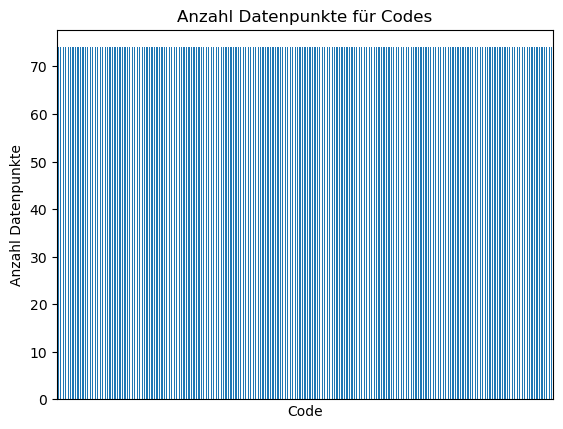

In [10]:
df['Code'].value_counts().plot(kind='bar', xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte für Codes');

### 3.2 Vergleich Anzahl Datenpunkte der Codes und Ethnien

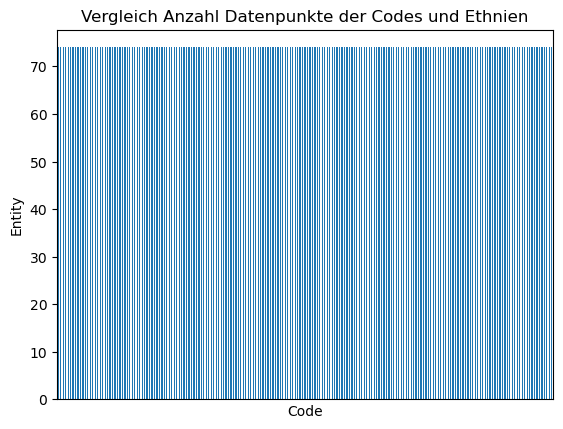

In [11]:
df['Code'].value_counts().plot(kind='bar', 
                               xticks=[], 
                               ylabel='', title='Vergleich Anzahl Datenpunkte der Codes und Ethnien');

### 3.3 Analyse Jahr (Year)

In [12]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  74


In [13]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
1950    201
1951    201
1952    201
1953    201
1954    201
       ... 
2019    201
2020    201
2021    201
2022    201
2023    201
Name: count, Length: 74, dtype: int64

In [14]:
# Jahre mit maximaler Anzahl Datenpunkte ()

### 3.4 Analyse Geburtenrate (Birth rate)

In [15]:
df.describe

<bound method NDFrame.describe of             Entity Code  Year  Birth rate
0      Afghanistan  AFG  1950      49.380
1      Afghanistan  AFG  1951      49.624
2      Afghanistan  AFG  1952      49.784
3      Afghanistan  AFG  1953      49.979
4      Afghanistan  AFG  1954      50.004
...            ...  ...   ...         ...
14869     Zimbabwe  ZWE  2019      31.121
14870     Zimbabwe  ZWE  2020      30.988
14871     Zimbabwe  ZWE  2021      30.932
14872     Zimbabwe  ZWE  2022      30.882
14873     Zimbabwe  ZWE  2023      30.410

[14874 rows x 4 columns]>

## 4. Analyse

### Vorgehen
### Beobachtung
### Interpretation QUELLE !!!!





## Berechnungen

## Visualisierung